In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
!pip install geopandas

from google.colab import drive
#Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Define file paths
fatal_accidents_2022_path = '/content/drive/My Drive/DSA PROJECT DATASETS/fatal-car-accidents-by-state-2022.csv'
fatal_accidents_2023_path = '/content/drive/My Drive/DSA PROJECT DATASETS/fatal-car-accidents-by-state-2023.csv'

#Load the CSV files
fatal_accidents_2022_df = pd.read_csv(fatal_accidents_2022_path)
fatal_accidents_2023_df = pd.read_csv(fatal_accidents_2023_path)

#--- Clean 2022 Fatal Accidents dataset ---
fatal_accidents_2022_df = fatal_accidents_2022_df.drop(columns=['stateFlagCode'])
fatal_accidents_2022_df = fatal_accidents_2022_df.iloc[:, :3]  #keep only State, deaths, rate
fatal_accidents_2022_df.columns = [
    'State',
    'Deaths due to car accidents (2022)',
    'Car accident deaths per 100k (2022)'
]

#--- Clean 2023 Fatal Accidents dataset ---
fatal_accidents_2023_df = fatal_accidents_2023_df[['State', 'Car Accident Deaths', 'Car Accident Deaths per 100k']]
fatal_accidents_2023_df.columns = [
    'State',
    'Deaths due to car accidents (2023)',
    'Car accident deaths per 100k (2023)'
]

#--- Merge side by side ---
df_wide = pd.merge(fatal_accidents_2022_df, fatal_accidents_2023_df, on='State', how='inner')

#--- Reorder columns so that each metric’s years are adjacent ---
df_wide = df_wide[
    [
        'State',
        'Deaths due to car accidents (2022)',
        'Deaths due to car accidents (2023)',
        'Car accident deaths per 100k (2022)',
        'Car accident deaths per 100k (2023)'
    ]
]

#Save it to a csv
df_wide.to_csv('fatal_accidents_2022_2023_wide.csv', index=False)

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#Now we work on the dataset of Speed limits according to state
#We computed the average of rural and urban interstate speed limits to create a single
#'InterstateSpeedAvg' value for each state.

#Why this is useful:
#- Simplifies analysis by combining two related variables into one representative metric.
#- Helps compare states using a single value in correlations.
#- Smooths out minor rural/urban differences and highlights general speed policy.

#file path
speed_limits_path = '/content/drive/My Drive/DSA PROJECT DATASETS/speed-limits-by-state-2025.csv'

#Load the CSV file
df_speed = pd.read_csv(speed_limits_path)

df_speed = df_speed[['state', 'SpeedLimitsRuralInterstates', 'SpeedLimitsUrbanInterstates']]
df_speed = df_speed.rename(columns={'state': 'State'})

df_speed['Rural'] = pd.to_numeric(
    df_speed['SpeedLimitsRuralInterstates'].str.extract(r'(\d+)')[0],
    errors='coerce'
)
df_speed['Urban'] = pd.to_numeric(
    df_speed['SpeedLimitsUrbanInterstates'].str.extract(r'(\d+)')[0],
    errors='coerce'
)

df_speed['InterstateSpeedAvg'] = df_speed[['Rural', 'Urban']].mean(axis=1)
df_speed = df_speed[['State', 'InterstateSpeedAvg']]
df_speed.to_csv('speed_limits_interstate_avg.csv', index=False)

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#combining datasets which dont need much cleaning, just the removal of an empty column

#Load each state‑level file with its path
seatbelt_usage_path = '/content/drive/My Drive/DSA PROJECT DATASETS/state_seatbelt_use_2022_2023.csv'
automobiles_path = '/content/drive/My Drive/DSA PROJECT DATASETS/automobiles_by_state_2022_2023.csv'
road_quality_path = '/content/drive/My Drive/DSA PROJECT DATASETS/road-quality-by-state-2025.csv'
alcohol_consumption_path = '/content/drive/My Drive/DSA PROJECT DATASETS/alcohol-consumption-by-state-2025.csv'

df_seat = pd.read_csv(seatbelt_usage_path)
df_auto = pd.read_csv(automobiles_path)
df_road = pd.read_csv(road_quality_path)
df_alc  = pd.read_csv(alcohol_consumption_path)

#Standardize the “State” column name in each DataFrame
df_seat = df_seat.rename(columns={df_seat.columns[0]: 'State'})
df_auto = df_auto.rename(columns={df_auto.columns[0]: 'State'})

#stateflagcode is an empty column in alot of these datasets, so we check for it to remove it just incase.
if 'stateFlagCode' in df_road.columns:
    df_road = df_road.drop(columns=['stateFlagCode'])
df_road = df_road.rename(columns={'state': 'State'})

if 'stateFlagCode' in df_alc.columns:
    df_alc = df_alc.drop(columns=['stateFlagCode'])
df_alc  = df_alc.rename(columns={'state': 'State'})

#Rename for convenience (easier identification) and select only the columns you need
df_seat = df_seat.rename(columns={
    '2022': 'Seatbelt 2022',
    '2023': 'Seatbelt 2023'
})[['State', 'Seatbelt 2022', 'Seatbelt 2023']]

#reordering columns
df_road = df_road[[
    'State',
    'RoadQuality2022Ranking',
    'RoadQuality2023Ranking',
    'RoadQualityUrbanPavementRoughness',
    'RoadQualityRuralPavementRoughness'
]]

#renaming for easier identification
df_alc = df_alc.rename(columns={
    'AlcoholConsumption_EthanolConsumption_gallonsPerCapita_2022': 'Ethanol per Capita (2022)',
    'AlcoholConsumption_ExcessiveDrinkingRate_pctOfPopulation_2022': 'Excessive Drinking % (2022)',
    'AlcoholConsumption_DrivingFatalitiesInvolvingAlcohol_pct_2022': 'Alcohol Fatalities % (2022)',
    'AlcoholConsumption_EthanolConsumption_gallonsPerCapita_2023': 'Ethanol per Capita (2023)',
    'AlcoholConsumption_ExcessiveDrinkingRate_pctOfPopulation_2023': 'Excessive Drinking % (2023)',
    'AlcoholConsumption_DrivingFatalitiesInvolvingAlcohol_pct_2023': 'Alcohol Fatalities % (2023)'
})

#reordering and selecting the needed columns from the dataset
df_alc = df_alc [[
    'State',
    'Ethanol per Capita (2022)',
    'Excessive Drinking % (2022)',
    'Alcohol Fatalities % (2022)',
    'Ethanol per Capita (2023)',
    'Excessive Drinking % (2023)',
    'Alcohol Fatalities % (2023)'
]]

#Merge them all on based on state. We will then further combine this dataset with other cleaned and handled data.
merged = (
    df_seat
    .merge(df_auto, on='State', how='inner')
    .merge(df_road, on='State', how='inner')
    .merge(df_alc,  on='State', how='inner')
)

#saving the combined dataset
merged.to_csv('merged_state_data.csv', index=False)

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#Here we read one of the last datasets that we need to handle, the Vehicle inspection dataset.
#Define file path
no_inspection_states_path = '/content/drive/My Drive/DSA PROJECT DATASETS/states-without-vehicle-inspection-2025.csv'

#Read the full CSV, skipping any bad lines
df_vi = pd.read_csv(
    no_inspection_states_path,
    engine='python',
    on_bad_lines='skip'  #Drop rows with the wrong number of fields
)


#Drop the flag‐code column and the free‑text details column
df_vi = df_vi.drop(columns=[
    'stateFlagCode',
    'StatesWithoutVehicleInspection_AdditionalDetails'
])

#Rename for consistency and easier identification
df_vi = df_vi.rename(columns={
    'state': 'State',
    'StatesWithoutVehicleInspection_SafetyInspectionRequirement': 'SafetyInspectionRequirement'
})

def rank_inspection(value):
    value = str(value).strip().lower()
    if "biennial" in value or "bi-annual" in value:
        return 1
    elif "single" in value or "once" in value:
        return 0.5
    elif "annual" in value and "none" in value:
        return 1.5
    elif "annual" in value:
        return 2
    elif value == '' or value == 'nan':
        return 0
    else:
        return 0

df_vi['InspectionRank'] = df_vi['SafetyInspectionRequirement'].apply(rank_inspection)

#Save cleaned and ranked dataset
df_vi.to_csv('states_without_inspection_cleaned.csv', index=False)

#So what we did basically here is  that we ranked vehicle inspection requirements by strictness
#We assigned numerical ranks to the `SafetyInspectionRequirement` column to reflect how strict
#each state's policy is (e.g., Annual = 2, Biennial = 1, etc.).
#Why this is helpful:
#- Enables quantitative analysis of inspection strictness.
#- Makes it easier to compare with other numerical variables (e.g., accident rates).
#- Captures policy variation more meaningfully than a simple binary (yes/no) format (that would be too general/unspecific).
#- Most importantly, it takes care of missing values

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#Now we combine all of these datasets into a single final one.
#Load the already‑cleaned, state‑keyed CSVs
df_fatal   = pd.read_csv('fatal_accidents_2022_2023_wide.csv')      #cleaned fatal accidents 2022/23
df_speed   = pd.read_csv('speed_limits_interstate_avg.csv')         #cleaned interstate speed averages
df_state   = pd.read_csv('merged_state_data.csv')                   #cleaned seatbelt/auto/road/alc data
df_inspect = pd.read_csv('states_without_inspection_cleaned.csv')   #cleaned inspection

#Merge them all on "State"
df_all = (
    df_fatal
      .merge(df_speed,   on='State', how='inner')
      .merge(df_state,   on='State', how='inner')
      .merge(df_inspect, on='State', how='inner')
)

#save it to a final csv
df_all.to_csv('all_state_data_merged.csv', index=False)


In [ ]:
#Adding new columns (Normalisation and furter cleaning of the dataset)
#Further cleaning and organisation of data to make it more useful
#Going to set up more columns so hypothesis testing is easier

from google.colab import data_table

#Load the merged dataset first
df = pd.read_csv('all_state_data_merged.csv')

#---------------------------------- Death Percentage Calculation ----------------------------------

#Analysis: Calculating Car Accident Deaths as a Percentage of Registered Automobiles

#To gain deeper insights into state-level traffic safety, we calculated the percentage of
#deaths due to car accidents relative to the total number of registered automobiles in each state,
#for both 2022 and 2023.

#Formula used:
#Death Percentage = (Car Accident Deaths / Registered Automobiles) * 100

#Why This Calculation Is Important
#1) Adjusts for Population & Vehicle Volume:
#- Raw death counts alone do not account for how many vehicles are on the road.
#- A state with more cars will naturally have more accidents, but not necessarily a higher *rate* of danger.
#- This percentage normalizes the data, enabling fair comparisons across states regardless of their size or vehicle count.

#2) Enables Better Cross-State Comparisons
#- By converting to a percentage, we can compare states like California (with millions of vehicles) to smaller states more meaningfully.
#- It helps identify states with disproportionately high accident death rates per vehicle, highlighting areas for policy focus.

#Calculating accident deaths as a percentage of automobiles adds critical context to the raw fatality numbers.
#It allows for more meaningful analysis by accounting for vehicle density and enabling fair, standardized comparisons
#across different regions and years.

#Drop previous versions if they exist to avoid duplication
df = df.drop(columns=[col for col in df.columns if col.startswith('DeathPercentage_')], errors='ignore')

#Now we calculate death percentages
df['DeathPercentage_2022'] = (df['Deaths due to car accidents (2022)'] / df['Automobiles_2022']) * 100
df['DeathPercentage_2023'] = (df['Deaths due to car accidents (2023)'] / df['Automobiles_2023']) * 100

#Round the values
df['DeathPercentage_2022'] = df['DeathPercentage_2022'].round(4)
df['DeathPercentage_2023'] = df['DeathPercentage_2023'].round(4)

#Reorder columns so DeathPercentage appears after Automobiles columns
cols = list(df.columns)
for col in ['DeathPercentage_2022', 'DeathPercentage_2023']:
    if col in cols:
        cols.remove(col)

insert_index = max(cols.index('Automobiles_2022'), cols.index('Automobiles_2023')) + 1
cols.insert(insert_index, 'DeathPercentage_2022')
cols.insert(insert_index + 1, 'DeathPercentage_2023')

df = df[cols]

#---------------------------------- Total Deaths Calculation ----------------------------------

#we will now combine car accident deaths from 2022 and 2023 into a single total column
#We will create a new column `TotalDeaths_2022_2023` to sum the number of deaths due to car accidents
#across both years for each state.

#why this is needed:
#- Smooths out anomalies: If one year had unusually high or low deaths due to temporary factors
#(e.g., natural disasters, lockdowns, policy changes), summing both years reduces year-specific noise.
#- Enables fairer comparisons: When comparing with other non-year-specific variables like
#'InterstateSpeedAvg', using a two-year total avoids skewed interpretations.
#- Enhances trend detection: Combining years can help identify consistently high- or low-risk states,
#rather than reacting to single-year fluctuations.

#Drop previously created TotalDeaths column if it exists
df = df.drop(columns=[col for col in df.columns if col.startswith('TotalDeaths_2022_2023')], errors='ignore')

#Now we calculate total deaths over 2022 and 2023
df['TotalDeaths_2022_2023'] = df['Deaths due to car accidents (2022)'] + df['Deaths due to car accidents (2023)']

#Reorder columns to insert new column after the 2023 deaths column
cols = list(df.columns)
if 'TotalDeaths_2022_2023' in cols:
    cols.remove('TotalDeaths_2022_2023')
insert_index = cols.index('Deaths due to car accidents (2023)') + 1
cols.insert(insert_index, 'TotalDeaths_2022_2023')

df = df[cols]

#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#save the cleaned and updated dataset
df.to_csv('all_state_data_merged.csv', index=False)

In [ ]:
#The final dataset
#Showing the DataFrame as an interactive table
data_table.DataTable(df)

,State,Deaths due to car accidents (2022),Deaths due to car accidents (2023),TotalDeaths_2022_2023,Car accident deaths per 100k (2022),Car accident deaths per 100k (2023),InterstateSpeedAvg,Seatbelt 2022,Seatbelt 2023,Automobiles_2022,...,RoadQualityUrbanPavementRoughness,RoadQualityRuralPavementRoughness,Ethanol per Capita (2022),Excessive Drinking % (2022),Alcohol Fatalities % (2022),Ethanol per Capita (2023),Excessive Drinking % (2023),Alcohol Fatalities % (2023),SafetyInspectionRequirement,InspectionRank
0,California,4428,4285,8713,11.3,10.9,67.5,95.3,96.2,13796109,...,44,5,2.63,18.8,27.7,2.49,18.0,29.0,NaN,0.0
1,Texas,4408,4498,8906,14.7,15.2,75.0,90.4,90.6,7674216,...,19,2,2.41,19.6,25.4,2.26,17.3,29.9,Annual,2.0
2,Florida,3530,3738,7268,15.9,17.1,67.5,88.3,89.4,7763368,...,5,1,2.74,20.2,22.0,2.61,17.4,28.2,NaN,0.0
3,Georgia,1797,1797,3594,16.5,16.7,70.0,89.3,87.6,3412234,...,5,1,1.91,17.8,20.7,1.90,16.8,23.4,NaN,0.0
4,North Carolina,1630,1663,3293,15.2,15.7,70.0,90.9,92.2,3276070,...,8,1,2.31,16.5,25.9,2.17,14.9,32.3,Annual,2.0
5,Tennessee,1314,1327,2641,18.6,19.0,70.0,90.5,91.9,2312012,...,9,2,2.30,17.2,23.5,2.14,11.2,28.0,NaN,0.0
6,Arizona,1302,1180,2482,17.7,16.2,70.0,87.0,87.8,2200806,...,12,4,2.24,17.4,22.3,2.25,16.0,27.6,NaN,0.0
7,Ohio,1275,1354,2629,10.8,11.5,67.5,80.8,84.8,3986322,...,16,2,2.12,20.7,32.5,2.03,19.2,34.3,NaN,0.0
8,Illinois,1268,1334,2602,10.1,10.5,62.5,93.0,92.9,3730443,...,21,6,2.42,22.9,28.8,2.39,21.2,34.2,NaN,0.0
9,Pennsylvania,1179,1230,2409,9.1,9.5,70.0,89.9,87.7,3738754,...,21,4,2.32,19.8,25.4,2.34,18.1,32.0,Annual,2.0


### **Choropleth Analysis: Total Fatal Car Accidents by State (2022–2023)**


This map shows the total fatal car accidents in U.S. States (2022-2023) highlighting key regional patterns.
*   High fatalities are concentrated in large, populous states like Texas, California, and Florida, likely due to more vehicles, longer road networks, and denser traffic.
*   Lower totals appear in smaller states like Vermont, Rhode Island, and Wyoming, which have fewer residents and vehicles.
*   The map shows absolute deaths, not adjusted for population so it doesn’t reflect risk per person or per mile driven.

The map highlights regional differences in traffic fatalities and points to
areas that may benefit from targeted safety measures.

In [ ]:
import plotly.express as px
import plotly.io as pio

#Ensure Plotly renders in Colab
pio.renderers.default = 'colab'

#Load the correct dataset
df = pd.read_csv('all_state_data_merged.csv')
df['State'] = df['State'].str.strip()

#Ensure TotalDeaths column exists
if 'TotalDeaths_2022_2023' not in df.columns:
    df['TotalDeaths_2022_2023'] = df['Deaths due to car accidents (2022)'] + df['Deaths due to car accidents (2023)']

#Use built-in GeoJSON for US states (Plotly’s version with full names)
geojson_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'

#Plot choropleth using purple color scale
fig = px.choropleth(df,
                    geojson=geojson_url,
                    locations='State',
                    featureidkey='properties.name',
                    color='TotalDeaths_2022_2023',
                    color_continuous_scale='Reds',
                    scope='usa',
                    title='Total Fatal Car Accidents by State (2022–2023)'
                   )

fig.update_layout(
    margin=dict(l=20, r=20, t=60, b=20),   # Reduce padding
    height=600,  #Optional: set a consistent height
    geo=dict(center=dict(lat=38, lon=-95))  #Rough center of USA
)
fig.show()

### **Comparison of Death Rates per State (2022 vs 2023)**

Building on the earlier choropleth that showed total state-wise fatalities, this bar chart shifts focus to **vehicle-normalized death percentages**, offering a fairer comparison across states. It presents fatality rates per registered vehicle for each U.S. state in 2022 and 2023, sorted in descending order based on 2023 values. This normalization removes the influence of population size and total vehicle count, allowing for a clearer assessment of relative fatality rates.


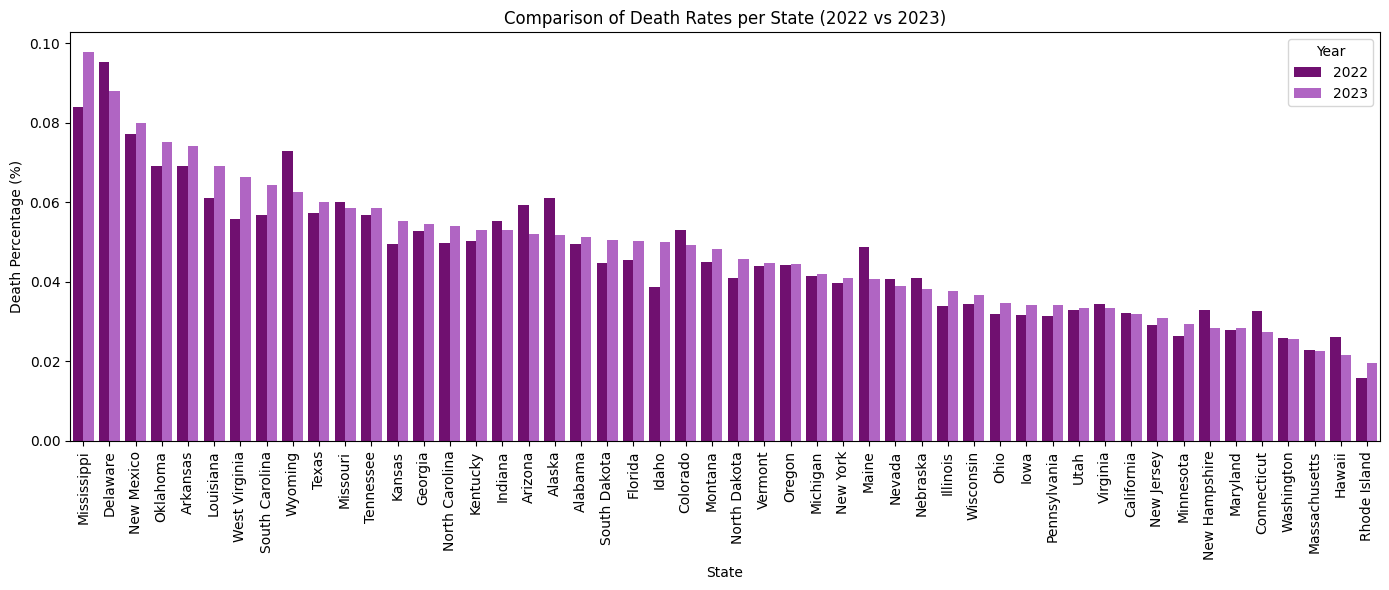

In [ ]:
#Load the dataset
df = pd.read_csv('all_state_data_merged.csv')

#Ensure death percentages are calculated
if 'DeathPercentage_2022' not in df.columns:
    df['DeathPercentage_2022'] = (df['Deaths due to car accidents (2022)'] / df['Automobiles_2022']) * 100
if 'DeathPercentage_2023' not in df.columns:
    df['DeathPercentage_2023'] = (df['Deaths due to car accidents (2023)'] / df['Automobiles_2023']) * 100

#Change the data format
df_melted = df[['State', 'DeathPercentage_2022', 'DeathPercentage_2023']].melt(
    id_vars='State',
    var_name='Year',
    value_name='DeathPercentage'
)

#Sort states by 2023 values in descending order (we will only use 2023 for this)
state_order = df.sort_values(by='DeathPercentage_2023', ascending=False)['State']

#Custom color palette for hue
custom_palette = {'DeathPercentage_2022': 'maroon', 'DeathPercentage_2023': 'green'}

#Rename columns to match hue labels in palette
df_melted['Year'] = df_melted['Year'].replace({
    'DeathPercentage_2022': '2022',
    'DeathPercentage_2023': '2023'
})

#Adjust the palette mapping accordingly
custom_palette = {'2022': '#800080', '2023': '#BA55D3'}

#Plot the bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x='State', y='DeathPercentage', hue='Year', order=state_order, palette=custom_palette)
plt.xticks(rotation=90)
plt.title('Comparison of Death Rates per State (2022 vs 2023)')
plt.ylabel('Death Percentage (%)')
plt.tight_layout()
plt.show()



*   **Mississippi**, **Alabama**, and **New Mexico** consistently show the highest death percentages in both years, highlighting states with the most elevated normalized fatality rates.  
*   Many states exhibit **minimal variation between years**, indicating overall consistency in fatality risk.
*   Some states such as **Arkansas**, **Montana**, and **Alaska** show a **notable decline** in death percentages from 2022 to 2023.
*   At the lower end of the scale, **Massachusetts**, **Rhode Island**, and **New Jersey** report the lowest fatality rates in both years.


This comparison enables a more precise identification of patterns and changes in road fatalities over time, independent of state size or total crash volume.

### **Correlation Analysis of Car Accident Factors**

To begin the analysis, we first test our main hypothesis by examining the relationships between fatal car accidents and various potential influencing factors. Additionally, we explore the correlations between other key variables related to car accidents. This initial step helps identify which factors are most closely associated with fatalities and may warrant further investigation.

### Hypothesis

**Null Hypothesis (H₀):** There is no significant relationship between fatal car accident rates and factors such as speed limits, alcohol consumption, road quality, vehicle inspection requirements, seatbelt usage, or the number of vehicles per capita across U.S. states.

**Alternative Hypothesis (H₁):** At least one of these factors — speed limits, alcohol consumption, road quality, vehicle inspection requirements, seatbelt usage, or vehicles per capita — has a significant relationship with fatal car accident rates across U.S. states.


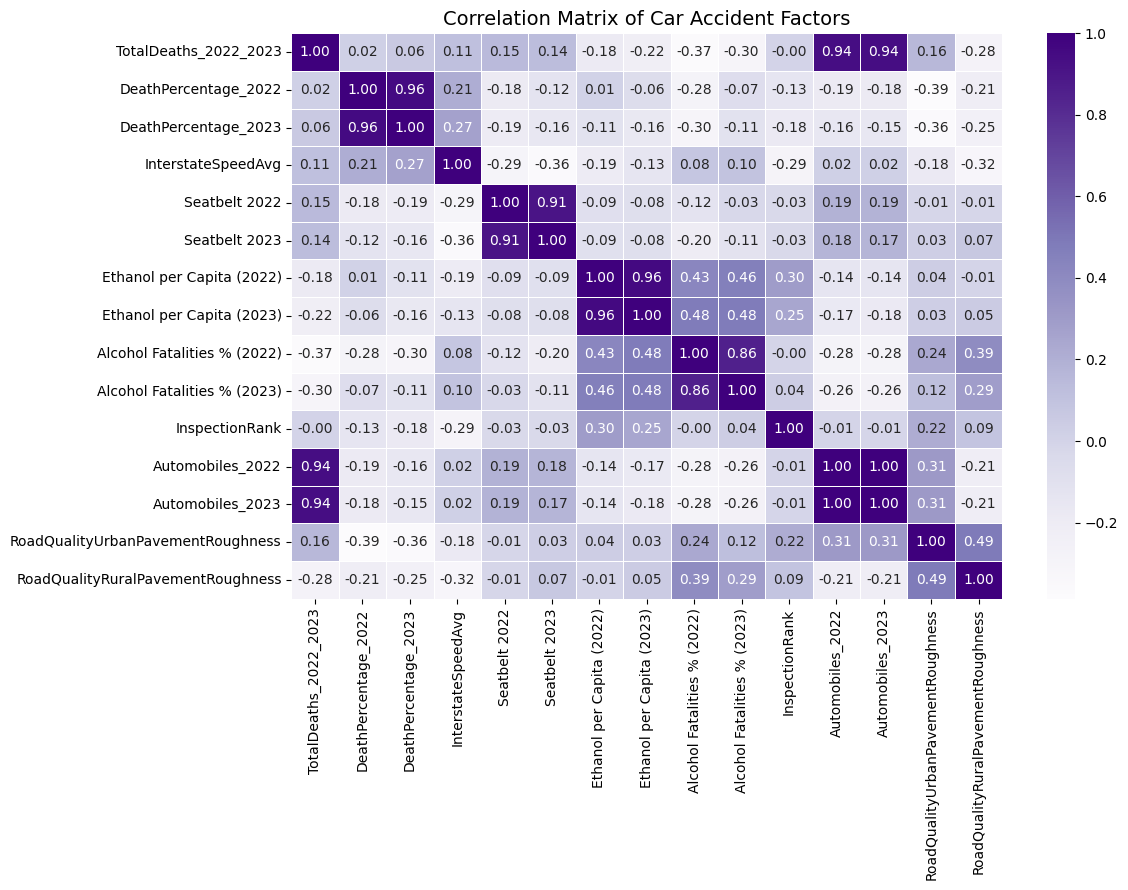

In [ ]:
#Select the relevant columns
correlation_columns = [
    'TotalDeaths_2022_2023',
    'DeathPercentage_2022',
    'DeathPercentage_2023',
    'InterstateSpeedAvg',
    'Seatbelt 2022',
    'Seatbelt 2023',
    'Ethanol per Capita (2022)',
    'Ethanol per Capita (2023)',
    'Alcohol Fatalities % (2022)',
    'Alcohol Fatalities % (2023)',
    'InspectionRank',
    'Automobiles_2022',
    'Automobiles_2023',
    'RoadQualityUrbanPavementRoughness',
    'RoadQualityRuralPavementRoughness'
]
correlation_data = df[correlation_columns]

#Compute and plot the correlation matrix
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_data.corr(), annot=True, cmap='Purples', fmt=".2f", linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix of Car Accident Factors', fontsize=14)
plt.tight_layout()
plt.show()


### Analysis Based on the Correlation Matrix

- **TotalDeaths_2022_2023** is highly positively correlated with both **Automobiles_2022** and **Automobiles_2023** (r ≈ 0.94). This strong association suggests that the number of vehicles in a state is closely tied to the total number of traffic-related deaths. However, this is partially expected, as vehicle count is used in calculating related fatality metrics.

- **DeathPercentage_2022** and **DeathPercentage_2023** show moderate negative correlations with **Seatbelt Usage** (r ≈ -0.16 to -0.19), implying that states with higher seatbelt usage tend to have lower fatality rates relative to population. Lets check this with the pear

In [ ]:
from scipy.stats import pearsonr
import pandas as pd

# Load the dataset
df = pd.read_csv('all_state_data_merged.csv')

# Pearson correlation for 2022
r_value_2022, p_value_2022 = pearsonr(df['Seatbelt 2022'], df['DeathPercentage_2022'])

# Pearson correlation for 2023
r_value_2023, p_value_2023 = pearsonr(df['Seatbelt 2023'], df['DeathPercentage_2023'])

# Print results
print("Seatbelt Usage vs Death Percentage 2022:")
print(f"Pearson correlation coefficient (r): {r_value_2022:.4f}")
print(f"P-value: {p_value_2022:.5f}")
if p_value_2022 < 0.05:
    print("Result: Significant correlation (reject the null hypothesis).")
else:
    print("Result: No significant correlation (fail to reject the null hypothesis).")

print("\nSeatbelt Usage vs Death Percentage 2023:")
print(f"Pearson correlation coefficient (r): {r_value_2023:.4f}")
print(f"P-value: {p_value_2023:.5f}")
if p_value_2023 < 0.05:
    print("Result: Significant correlation (reject the null hypothesis).")
else:
    print("Result: No significant correlation (fail to reject the null hypothesis).")


Seatbelt Usage vs Death Percentage 2022:
Pearson correlation coefficient (r): -0.1828
P-value: 0.20391
Result: No significant correlation (fail to reject the null hypothesis).

Seatbelt Usage vs Death Percentage 2023:
Pearson correlation coefficient (r): -0.1561
P-value: 0.27913
Result: No significant correlation (fail to reject the null hypothesis).


According to the pearson test however, for both year cases (2022 and 2023) the null hypothesis fails to be rejected here.

### Additional Correlation Insights according to the correlation matrix above

- **Alcohol Fatalities % (2022 and 2023)** exhibit strong positive correlations with **Ethanol per Capita** (r ≈ 0.43–0.48), suggesting that higher alcohol consumption is associated with more alcohol-related car fatalities. While relevant, these metrics are not directly part of the overall fatality rate hypothesis tested above.

- **InterstateSpeedAvg** and **Road Quality** metrics show weak to no meaningful correlation with fatality rates, indicating a limited direct linear relationship. These factors may influence crash severity or likelihood through more complex mechanisms.

- **InspectionRank** demonstrates minimal correlation with fatality metrics, implying that state-level inspection policy stringency does not independently predict fatality rates in this dataset.

---

### Conclusion

While correlations suggest potential relationships between variables like seatbelt usage and vehicle count with fatality outcomes, statistical testing shows **no significant relationship** at the population level across states for the tested hypothesis. The **null hypothesis cannot be rejected** based on current results. However, some behavioral factors (like alcohol consumption) may still warrant further focused analysis.


This correlation matrix serves as a foundation for identifying relationships worth modeling or visualizing further correlations

### **Breakdown of Fatal Car Accidents by Alcohol Involvement (2022)**

This bar chart displays the **percentage of fatal car accidents involving alcohol** in each U.S. state for the year 2022. It highlights the extent to which alcohol plays a role in traffic fatalities across states.


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Load data
df = pd.read_csv('all_state_data_merged.csv')
df['State'] = df['State'].str.strip()

#abbreviations foir the chloropleth map
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
df['State Abbrev'] = df['State'].map(state_abbrev)
df = df.dropna(subset=['State Abbrev'])

#Sort the bar chart in descending order for better comparison
df_compare = df[['State', 'Alcohol Fatalities % (2022)', 'Alcohol Fatalities % (2023)']].dropna()
df_compare = df_compare.sort_values(by='Alcohol Fatalities % (2023)', ascending=False)

#Calculate difference for map
df['Fatality Change'] = df['Alcohol Fatalities % (2023)'] - df['Alcohol Fatalities % (2022)']

#Create subplot layout (2 rows x 1 column)
fig = make_subplots(
    rows=2, cols=1,
    specs=[[{"type": "xy"}], [{"type": "choropleth"}]],
    subplot_titles=["Grouped Bar Chart: Alcohol Fatalities", "Difference Map (2023 - 2022)"],
    vertical_spacing=0.15
)

#Add grouped bar chart with vibrant purples
fig.add_trace(
    go.Bar(
        x=df_compare['State'],
        y=df_compare['Alcohol Fatalities % (2022)'],
        name='2022',
        offsetgroup=0,
        marker_color='rgba(179, 136, 255, 0.9)'  #Vibrant lavender purple
    ),
    row=1, col=1
)
fig.add_trace(
    go.Bar(
        x=df_compare['State'],
        y=df_compare['Alcohol Fatalities % (2023)'],
        name='2023',
        offsetgroup=1,
        marker_color='rgba(106, 27, 154, 0.9)'  #Deep vibrant purple
    ),
    row=1, col=1
)

#Add difference map with custom purple color scale
fig.add_trace(
    go.Choropleth(
        locations=df['State Abbrev'],
        z=df['Fatality Change'],
        locationmode='USA-states',
        colorscale=[  #Purple-based diverging scale
            [0, '#ffe6e6'],
            [0.5, '#ffffff'],
            [1, '#8b0000']
        ],
        zmid=0,
        colorbar=dict(
            title='Change in %',
            x=0.92,
            y=0.15,
            len=0.3,
            thickness=15
        ),
        text=df['State'],
        hoverinfo='text+z',
        name='Change Map'
    ),
    row=2, col=1
)

#Layout adjustments
fig.update_layout(
    title_text='Alcohol Fatalities by State: Comparison and Change (2022 vs 2023)',
    height=900,
    barmode='group',
    bargap=0.25,
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.95,
        xanchor="left",
        x=1.02,
        title=None
    ),
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa')
    ),
    margin=dict(t=80, b=100)
)

#X-axis adjustments
fig.update_xaxes(tickangle=90, tickfont=dict(size=9), row=1, col=1)

#Show plot
fig.show()


## Visual Comparison: Bar Chart

**Top States in Both Years:**

*   Montana, North Dakota, and Rhode Island remain at the top of the list with the highest alcohol-related fatality percentages in both 2022 and 2023.
*   The ordering slightly shifts, but the core high-risk states are consistent across both years.


**General Shape:**

*   The distribution appears quite similar: a gradual decline from the highest (46%) to the lowest (18–22%) in both years.
*   No state shows a dramatic spike or drop, suggesting relative consistency in state-level patterns.


### Visual Comparision: Map

**Geographical Patterns:**

*   Several Southeastern and Central states experienced notable increases in alcohol-related fatality rates.
*   Western and Midwestern regions generally showed stable or minimal changes.
*   Some Southern and Southwestern states saw moderate decreases, indicating potential improvements.
*   The Northeast displayed mixed trends, with no clear regional pattern.



### **Vehicle-Normalized Death Percentage vs. Interstate Speed Limit (2022 & 2023)**

Further comparing the normalized death percentage with other variables, we examine how it relates to the **average interstate speed limit** across U.S. states. These side-by-side scatter plots represent the relationship for **2022** (left) and **2023** (right).


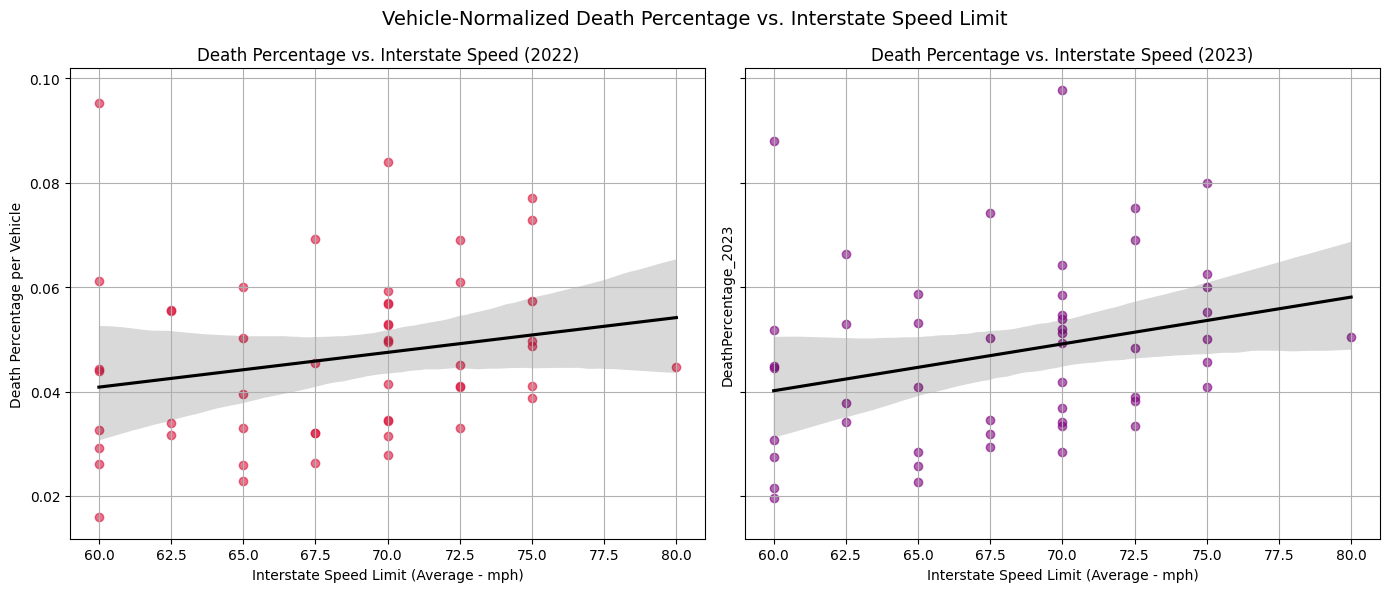

In [ ]:
#Create side-by-side plots with regression lines
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

#2022 Plot with regression
sns.regplot(data=df, x='InterstateSpeedAvg', y='DeathPercentage_2022',
            scatter_kws={'color': 'crimson', 'alpha': 0.6},
            line_kws={'color': 'black'}, ax=axes[0])
axes[0].set_title('Death Percentage vs. Interstate Speed (2022)')
axes[0].set_xlabel('Interstate Speed Limit (Average - mph)')
axes[0].set_ylabel('Death Percentage per Vehicle')
axes[0].grid(True)

#2023 Plot with regression
sns.regplot(data=df, x='InterstateSpeedAvg', y='DeathPercentage_2023',
            scatter_kws={'color': 'purple', 'alpha': 0.6},
            line_kws={'color': 'black'}, ax=axes[1])
axes[1].set_title('Death Percentage vs. Interstate Speed (2023)')
axes[1].set_xlabel('Interstate Speed Limit (Average - mph)')
axes[1].grid(True)

#Super title and layout
plt.suptitle('Vehicle-Normalized Death Percentage vs. Interstate Speed Limit', fontsize=14)
plt.tight_layout()
plt.show()

- In both years, the data points are widely scattered across all speed ranges, with no strong upward or downward trend.
- States with the same speed limits (e.g., 70 mph) show a wide range of fatality percentages, indicating that speed alone is not a strong predictor of vehicle-normalized death rates.
- The similarity between the two plots suggests a **consistent trend year-over-year**, reinforcing the observation that interstate speed limit, when viewed in isolation, does not appear to drive significant changes in fatality percentages.
- The analysis implies that **other factors**, such as seatbelt usage, alcohol involvement, inspection policies, and road quality, may have a stronger influence on fatality risk than posted speed limits alone.


### **Death Percentage (2023) vs. Vehicle Inspection Strictness**

This box plot compares the **vehicle-normalized fatality percentage in 2023** across states grouped by their level of vehicle inspection strictness, represented by InspectionRank:

- **0** = No inspection requirement  
- **0.5** = Single or one-time inspection  
- **1** = Biennial inspections  
- **2** = Annual inspections



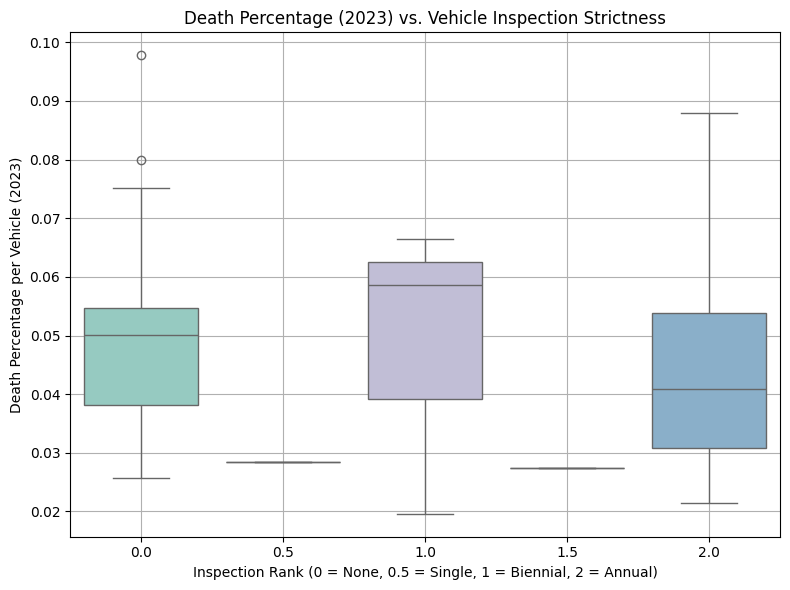

In [ ]:
#Load the dataset
df = pd.read_csv('all_state_data_merged.csv')

#Ensure death percentage and inspection rank exist
if 'DeathPercentage_2023' not in df.columns:
    df['DeathPercentage_2023'] = (df['Deaths due to car accidents (2023)'] / df['Automobiles_2023']) * 100

red_shades = {0: '#ff9999', 0.5: '#ff6666', 1: '#cc0000', 2: '#990000'}

#Plot: InspectionRank vs. DeathPercentage (future-proofed)
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='InspectionRank',
    y='DeathPercentage_2023',
    hue='InspectionRank',        #This was done to remove the potential error of the pallette update in the library
    palette='Set3',
    legend=False
)
plt.title('Death Percentage (2023) vs. Vehicle Inspection Strictness')
plt.xlabel('Inspection Rank (0 = None, 0.5 = Single, 1 = Biennial, 2 = Annual)')
plt.ylabel('Death Percentage per Vehicle (2023)')
plt.grid(True)
plt.tight_layout()
plt.show()



Observations:
- States with **annual inspections (rank = 2)** show the **lowest median death percentages**, with a narrower spread of values.
- States with **no inspection requirements (rank = 0)** and **biennial inspections (rank = 1)** display **higher medians and greater variability**.
- Some outliers exist, but the overall trend suggests that **stricter inspection policies may be associated with lower fatality rates per vehicle**.

While this plot alone doesn't prove causality, it suggests a potential link worth exploring further alongside other contributing factors such as road quality, seatbelt usage, or alcohol consumption.

### **Road Surface Quality vs Total Car Accident Deaths (2022–2023)**

This figure presents two side-by-side scatter plots analyzing how **pavement roughness** in urban and rural areas correlates with the **total number of traffic fatalities** per state over the years 2022 and 2023.

- The **left plot** compares **urban pavement roughness** to total deaths
- The **right plot** compares **rural pavement roughness** to total deaths


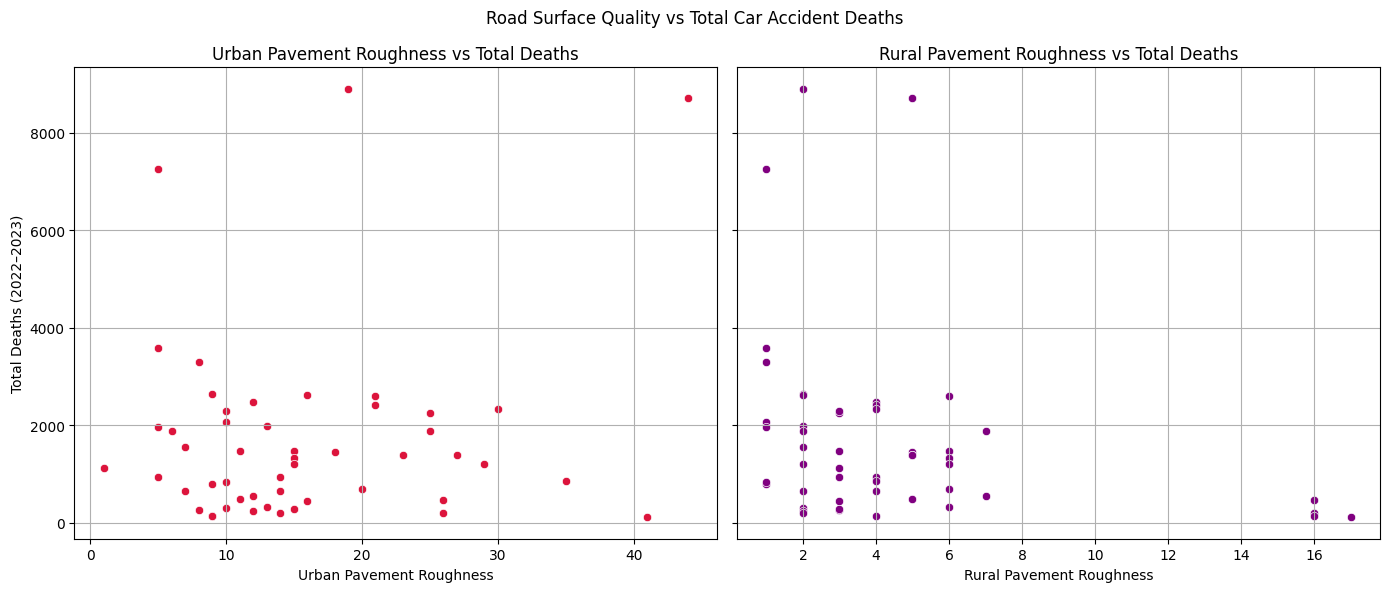

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading the dataset in every graph for safety
df = pd.read_csv('all_state_data_merged.csv')

#Ensure the total deaths column exists (i was experiencing errors)
if 'TotalDeaths_2022_2023' not in df.columns:
    df['TotalDeaths_2022_2023'] = df['Deaths due to car accidents (2022)'] + df['Deaths due to car accidents (2023)']

#Plot: Urban and Rural Roughness vs Total Deaths
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

#Urban pavement roughness
sns.scatterplot(data=df, x='RoadQualityUrbanPavementRoughness', y='TotalDeaths_2022_2023', ax=axes[0], color='crimson')
axes[0].set_title('Urban Pavement Roughness vs Total Deaths')
axes[0].set_xlabel('Urban Pavement Roughness')
axes[0].set_ylabel('Total Deaths (2022–2023)')
axes[0].grid(True)

#Rural pavement roughness
sns.scatterplot(data=df, x='RoadQualityRuralPavementRoughness', y='TotalDeaths_2022_2023', ax=axes[1], color='Purple')
axes[1].set_title('Rural Pavement Roughness vs Total Deaths')
axes[1].set_xlabel('Rural Pavement Roughness')
axes[1].set_ylabel('')
axes[1].grid(True)

plt.suptitle('Road Surface Quality vs Total Car Accident Deaths')
plt.tight_layout()
plt.show()

**Key Insights**:
- In both graphs, fatality totals appear to be widely distributed across various levels of roughness, indicating **no strong linear relationship**
- A few states with **high fatality counts** also show **low or moderate roughness scores**, suggesting that road surface quality may not be the primary driver of fatal crashes
- Most roughness values are concentrated in the **lower range**, especially for rural roads, while urban roads show a broader spread in surface conditions

These plots suggest that pavement roughness alone is **not a reliable predictor** of fatality totals. However, it may still interact with other factors.


### **Seatbelt Usage vs. Vehicle-Normalized Death Percentage (2022)**

This scatter plot examines the relationship between **seatbelt usage percentage** and the **death percentage per registered vehicle** for each state in 2022. Each point represents a U.S. state, and the black regression line shows the overall trend.



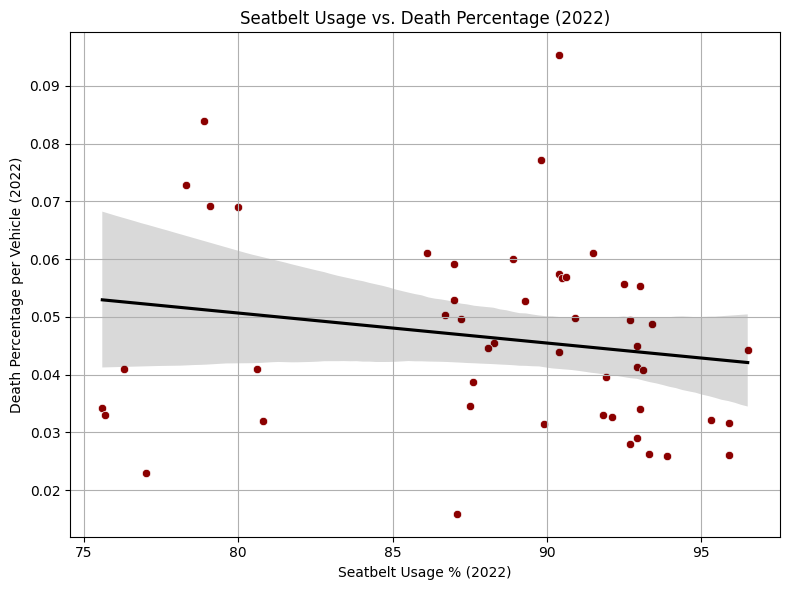

In [ ]:
df = pd.read_csv('all_state_data_merged.csv')

#Ensure the death percentage column is computed
if 'DeathPercentage_2022' not in df.columns:
    df['DeathPercentage_2022'] = (df['Deaths due to car accidents (2022)'] / df['Automobiles_2022']) * 100

#------------------------------------------
#Plot 1: Seatbelt Usage vs. Death Percentage (2022)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Seatbelt 2022', y='DeathPercentage_2022', color='darkred')
sns.regplot(data=df, x='Seatbelt 2022', y='DeathPercentage_2022', scatter=False, color='black')
plt.title('Seatbelt Usage vs. Death Percentage (2022)')
plt.xlabel('Seatbelt Usage % (2022)')
plt.ylabel('Death Percentage per Vehicle (2022)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations**:
- There is a **slight negative correlation**: as seatbelt usage increases, the death percentage tends to decrease
- The trendline slopes downward, suggesting that states with **higher seatbelt compliance** generally have **lower fatality rates** relative to the number of vehicles
- While the correlation is modest and there is variability among states, the general pattern reinforces the role of seatbelt usage as a contributing factor in reducing traffic deaths

This visualization supports the idea that seatbelt may be a influencing factor when it comes to Fatal car accident death rates, even if it is not the only one.

After this viusalisation, lets move on to testing a hypothesis on similar data in the dataset, specifically the "Car accident deaths per 100k (2022)"

### Hypothesis Test: Seatbelt Usage vs. Car Accident Death Rate (2022)

**Hypothesis:**

> Null Hypothesis (H₀):
There is no significant relationship between seatbelt usage rates and the number of deaths per 100,000 people in car accidents.

> Alternative Hypothesis (H₁):
Higher seatbelt usage is significantly associated with fewer deaths per 100,000 people in car accidents.


We will first check if both the column variables are normalised through histograms. If not, we lean towards using the Spearman Correlation.

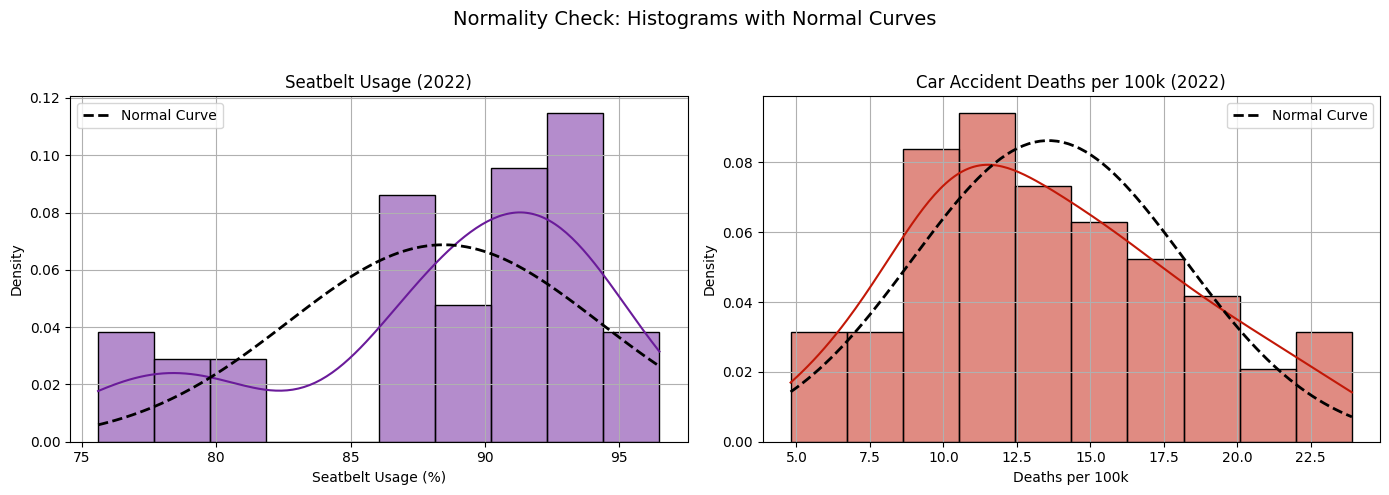

In [ ]:
import scipy.stats as stats

df = pd.read_csv("all_state_data_merged.csv")

#Extract data
seatbelt_2022 = df['Seatbelt 2022']
deaths_2022 = df['Car accident deaths per 100k (2022)']

#Set up figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

#Plot 1: Seatbelt Usage Histogram
sns.histplot(seatbelt_2022, kde=True, stat="density", bins=10, color="#6a1b9a", edgecolor="black", ax=axes[0])
mean1 = seatbelt_2022.mean()
std1 = seatbelt_2022.std()
x1 = np.linspace(seatbelt_2022.min(), seatbelt_2022.max(), 100)
p1 = stats.norm.pdf(x1, mean1, std1)
axes[0].plot(x1, p1, 'k--', linewidth=2, label='Normal Curve')
axes[0].set_title("Seatbelt Usage (2022)")
axes[0].set_xlabel("Seatbelt Usage (%)")
axes[0].set_ylabel("Density")
axes[0].legend()
axes[0].grid(True)

#Plot 2: Deaths per 100k Histogram
sns.histplot(deaths_2022, kde=True, stat="density", bins=10, color="#c21807", edgecolor="black", ax=axes[1])
mean2 = deaths_2022.mean()
std2 = deaths_2022.std()
x2 = np.linspace(deaths_2022.min(), deaths_2022.max(), 100)
p2 = stats.norm.pdf(x2, mean2, std2)
axes[1].plot(x2, p2, 'k--', linewidth=2, label='Normal Curve')
axes[1].set_title("Car Accident Deaths per 100k (2022)")
axes[1].set_xlabel("Deaths per 100k")
axes[1].legend()
axes[1].grid(True)

#Overall layout
plt.suptitle("Normality Check: Histograms with Normal Curves", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Normality Check Above: Seatbelt Usage and Car Accident Deaths (2022)

#### Seatbelt Usage (2022)
- Slight left skew with most values above 85%
- KDE line deviates from the normal curve, especially at lower values
- Likely not normally distributed

#### Car Accident Deaths per 100k (2022)
- Right-skewed with a heavy tail above 20 deaths per 100k
- Normal curve does not fit well, especially in the upper range
- Also likely not normally distributed

#### Histogram Observation Conclusion
Since both variables show deviations from normality, I am deciding to use  **Spearman correlation**  to test my hypothesis testing.

**Test Performed:**  
Spearman Correlation



In [ ]:
from scipy.stats import spearmanr

#Load dataset
df = pd.read_csv("all_state_data_merged.csv")

#Extract 2022 data
x = df['Seatbelt 2022']
y = df['Car accident deaths per 100k (2022)']

#Perform Spearman Correlation
corr_val, p_val = spearmanr(x, y)

#Output results
print("Test Used: Spearman Correlation")
print(f"Correlation Coefficient: {corr_val:.3f}")
print(f"P-value: {p_val:.5f}")

Test Used: Spearman Correlation
Correlation Coefficient: -0.280
P-value: 0.04872


### Results:
- **Correlation coefficient (ρ):** -0.280
- **P-value:** 0.049

### Conclusion:  
There is a statistically significant negative correlation between seatbelt usage and car accident deaths per 100k in 2022. As seatbelt usage increases, fatality rates tend to decrease.

While the correlation is not strong, it is significant at the 5% level, supporting the hypothesis that increased seatbelt use is associated fewer deaths per 100,000 people in car accidents.



### **Alcohol Fatalities vs. Excessive Drinking (2022)**

This scatter plot explores the relationship between the **percentage of adults reporting excessive drinking** and the **percentage of fatal car accidents involving alcohol** across U.S. states in 2022. Even though this is a more straightforward comparison, its still important to confirm that the correlation between these two fcators exists.



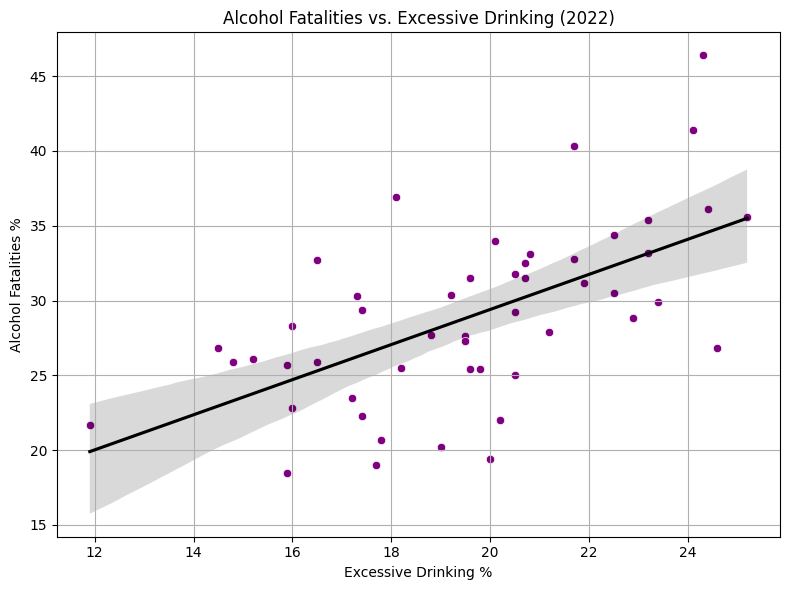

In [ ]:
#Plot 2: Alcohol Fatalities vs. Excessive Drinking (2022)
#------------------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Excessive Drinking % (2022)', y='Alcohol Fatalities % (2022)', color='purple')
sns.regplot(data=df, x='Excessive Drinking % (2022)', y='Alcohol Fatalities % (2022)', scatter=False, color='black')
plt.title('Alcohol Fatalities vs. Excessive Drinking (2022)')
plt.xlabel('Excessive Drinking %')
plt.ylabel('Alcohol Fatalities %')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations**:
- The regression line shows a **clear positive correlation**: as excessive drinking rates increase, so do alcohol-related traffic fatalities.
- States with higher levels of reported excessive drinking tend to experience a **greater proportion of alcohol-involved fatal crashes**.
- The trendline's slope and clustering of points along the upward direction suggest a relatively strong relationship.

Lets also test these observations through hypothesis testing.

###  Hypothesis Test: Alcohol Consumption Behaviors vs. Alcohol-Related Fatalities (2022)

**Hypothesis:**

> Null Hypothesis (H₀):
There is no significant relationship between excessive drinking rates or ethanol consumption per capita and alcohol-related car fatalities.

> Alternative Hypothesis (H₁):
Higher excessive drinking rates and higher ethanol consumption per capita are significantly associated with increased alcohol-related car fatalities.

---

**Variables Used:**
  - *Ethanol per Capita (2022)*
  - *Excessive Drinking % (2022)*

**Test Performed:**  
Spearman Correlation (since we are not sure of the normality of the variables being tested.)



In [ ]:
from scipy.stats import spearmanr

df = pd.read_csv("all_state_data_merged.csv")

#Extract 2022 data (no need to drop missing values)
x_ethanol = df['Ethanol per Capita (2022)']
x_drinking = df['Excessive Drinking % (2022)']
y_fatalities = df['Alcohol Fatalities % (2022)']

#Function to perform Spearman correlation
def correlation_analysis_spearman(x, y):
    test = "Spearman"
    corr, p = spearmanr(x, y)
    return test, corr, p

#Run Spearman correlation
ethanol_test, ethanol_corr, ethanol_p = correlation_analysis_spearman(x_ethanol, y_fatalities)
drinking_test, drinking_corr, drinking_p = correlation_analysis_spearman(x_drinking, y_fatalities)

#Show results
print(f"Ethanol vs Alcohol Fatalities: {ethanol_test} | r = {ethanol_corr:.3f} | p = {ethanol_p:.5f}")
print(f"Drinking % vs Alcohol Fatalities: {drinking_test} | r = {drinking_corr:.3f} | p = {drinking_p:.5f}")

Ethanol vs Alcohol Fatalities: Spearman | r = 0.447 | p = 0.00115
Drinking % vs Alcohol Fatalities: Spearman | r = 0.611 | p = 0.00000


### Results:

| Variable Pair                          | Correlation Type | Correlation Coefficient (r) | p-value   | Significant? |
|---------------------------------------|------------------|-----------------------------|-----------|--------------|
| Ethanol per Capita vs Alcohol Fatalities | Spearman         | 0.447                       | 0.00115   | Yes        |
| Excessive Drinking % vs Alcohol Fatalities | Spearman       | 0.611                       | 0.00000   | Yes        |

---

### Interpretation:

**Ethanol per Capita vs. Alcohol Fatalities %**  
There is a **moderate, statistically significant positive correlation** between ethanol consumption per capita and the percentage of alcohol-related car fatalities. This suggests that states with higher ethanol use tend to experience more fatal traffic incidents involving alcohol.  

**Excessive Drinking % vs. Alcohol Fatalities %**  
There is a **strong, statistically significant positive correlation** between the percentage of people who engage in excessive drinking and alcohol-related traffic fatalities. This also confirms our observations earlier that we dediced from the graph.

---

### Conclusion:

Both ethanol consumption and excessive drinking rates are **positively associated** with alcohol-related fatal crashes. These findings support the hypothesis that alcohol-related behaviors are associated with increased alcohol-related car fatalities.


### Hypothesis Test: Total Automobiles vs. Car Accident Deaths (2022 & 2023)

**Hypothesis:**
> H₀ (Null Hypothesis): There is no monotonic relationship between the number of registered vehicles and the total number of car accident fatalities.

> H₁ (Alternative Hypothesis): States with more registered vehicles tend to have more car accident fatalities.

---

**Variables Used:**
- *Automobiles_2022*, *Automobiles_2023* (Total registered vehicles)
- *Deaths due to car accidents (2022)*, *(2023)*


**Test Chosen:**  
*Pearson Correlation* was chosen as both variables are quantitative and approximately linear in relationship.




In [ ]:
from scipy.stats import pearsonr

#Load dataset
df = pd.read_csv("all_state_data_merged.csv")

#Extract 2022 data
auto_2022 = df['Automobiles_2022']
deaths_2022 = df['Deaths due to car accidents (2022)']
r2022, p2022 = pearsonr(auto_2022, deaths_2022)

#Extract 2023 data
auto_2023 = df['Automobiles_2023']
deaths_2023 = df['Deaths due to car accidents (2023)']
r2023, p2023 = pearsonr(auto_2023, deaths_2023)

#Print results
print(f"2022 Pearson correlation: r = {r2022:.3f}, p = {p2022:.5f}")
print(f"2023 Pearson correlation: r = {r2023:.3f}, p = {p2023:.5f}")


2022 Pearson correlation: r = 0.940, p = 0.00000
2023 Pearson correlation: r = 0.931, p = 0.00000


### Results:

| Year | Correlation Coefficient (r) | P-Value   | Significant? |
|------|-----------------------------|-----------|--------------|
| 2022 | 0.940                       | 0.00000   | Yes       |
| 2023 | 0.931                       | 0.00000   | Yes       |

---

### Interpretation:

- Both years show a **very strong and statistically significant positive correlation** between the number of registered vehicles and total car accident deaths.
- The correlation coefficients (r = 0.940 for 2022 and r = 0.931 for 2023) are near-perfect, indicating a consistent and strong linear relationship.
- These findings **strongly support the hypothesis**: **States with more vehicles tend to experience more fatal traffic accidents**.

---

### Conclusion:

This result reinforces the link between vehicle volume and traffic fatalities. As vehicle ownership increases, exposure to road risks rises. Hence, the results support the alternate hypothesis.


###  ANOVA Analysis: Vehicle Inspection Rank vs. Car Accident Death Rate (2022)

**Hypothesis:**

> H₀ (Null Hypothesis): There is no significant difference in the average fatality rates among states with different vehicle inspection ranks.

> H₁ (Alternative Hypothesis):
There is a significant difference in the average fatality rates among states with different vehicle inspection ranks.

---

**Test Type:**  
One-Way ANOVA

**Independent Variable:**  
- InspectionRank (Ordinal scale: e.g., 0 = No Inspection, 2 = Annual Inspection)

**Dependent Variable:**  
- Car accident deaths per 100k (2022)





In [ ]:
#importing the required libraries
from scipy.stats import f_oneway

#loading the dataset
df = pd.read_csv("all_state_data_merged.csv")

#Extract relevant columns (no need to drop missing values, they were taken care of in the beggining)
df_anova = df[['InspectionRank', 'Car accident deaths per 100k (2022)']]

#Group data by InspectionRank
grouped_data = df_anova.groupby('InspectionRank')['Car accident deaths per 100k (2022)'].apply(list)

#Perform one-way ANOVA
f_stat, p_value = f_oneway(*grouped_data)

#Display results
print("ANOVA Test: InspectionRank vs. Car Accident Deaths per 100k (2022)")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.5f}")
print("Groups tested:", grouped_data.index.tolist())

ANOVA Test: InspectionRank vs. Car Accident Deaths per 100k (2022)
F-statistic: 1.7914
P-value: 0.14720
Groups tested: [0.0, 0.5, 1.0, 1.5, 2.0]


###  Results:

| Metric        | Value        |
|---------------|--------------|
| F-statistic   | 1.79     |
| p-value       | 0.147    |
| Groups tested | [ 0.0, 0.5, 1.0, 1.5, 2.0 ] |

---

###  Interpretation:

- The p-value is **greater than 0.05**, so we fail to reject the null hypothesis.
- This suggests there is no statistically significant difference in mean death rates between states with different inspection ranks in 2022.
- Therefore, based on this data, inspection policy alone does not appear to influence fatality rates significantly.

---

### Conclusion:

While safety inspections might play a role in overall vehicle safety, this analysis indicates that other variables (like alcohol use, seatbelt rates, or road conditions) may be more influential in determining per-capita traffic deaths. I would need to use further tests to determine its exact importance.

### Paired T-Test: Year-to-Year Change in Fatality Metrics (2022 → 2023)

**Hypothesis:**

> H₀ (Null Hypothesis): There is no significant difference in fatality-related variables between 2022 and 2023.

> H₁ (Alternative Hypothesis):
There is a significant difference in fatality-related variables between 2022 and 2023.

---

**Variables**
- Car accident deaths per 100k (2022) vs. (2023)
- Alcohol Fatalities % (2022) vs. (2023)

**Test Type:**  
Paired T-Test (two-tailed)





In [ ]:
from scipy.stats import ttest_rel

df = pd.read_csv("all_state_data_merged.csv")

#Extract paired columns (no need to drop NA since data is clean)
deaths_data_2022 = df['Car accident deaths per 100k (2022)']
deaths_data_2023 = df['Car accident deaths per 100k (2023)']
alcohol_data_2022 = df['Alcohol Fatalities % (2022)']
alcohol_data_2023 = df['Alcohol Fatalities % (2023)']

#Perform Paired T-Tests
t_stat_deaths, p_val_deaths = ttest_rel(deaths_data_2022, deaths_data_2023)
t_stat_alcohol, p_val_alcohol = ttest_rel(alcohol_data_2022, alcohol_data_2023)

#Print Results
print("Paired T-Test Results (2022 vs 2023)\n")
print("Car accident deaths per 100k:")
print(f"  t-statistic = {t_stat_deaths:.3f}")
print(f"  p-value     = {p_val_deaths:.5f}")
print("\nAlcohol Fatalities %:")
print(f"  t-statistic = {t_stat_alcohol:.3f}")
print(f"  p-value     = {p_val_alcohol:.5f}")

Paired T-Test Results (2022 vs 2023)

Car accident deaths per 100k:
  t-statistic = -0.384
  p-value     = 0.70241

Alcohol Fatalities %:
  t-statistic = -6.614
  p-value     = 0.00000


### Results:

| Metric                          | t-statistic | p-value       | Significant? |
|--------------------------------|-------------|---------------|--------------|
| Car accident deaths per 100k   | -0.384      | 0.70241  |  No        |
| Alcohol Fatalities %           | -6.614      | 0.00000  |  Yes       |

---

### Interpretation:

- There is no statistically significant change in the car accident death rate per 100,000 people from 2022 to 2023.
- However, there is a significant decrease in the percentage of alcohol-related fatalities across states between the two years.
- This suggests that any efforts (that might have been made) to combat alcohol-involved crashes may have had a measurable effect.

---

### Conclusion:
While overall accident death rates remained stable, alcohol-specific interventions or behavior changes between 2022 and 2023 may have led to less fatal deaths. Hence, the results partially support the alternate hypothesis.

###  One-Way ANOVA: Interstate Speed Groups vs. Car Accident Death Rate (2022)

**Hypothesis:**

> H₀ (Null Hypothesis):
There is no significant difference in average car accident fatality rates among states with different average interstate speed limits.

> H₁ (Alternative Hypothesis):  
There is a significant difference in average car accident fatality rates among states with different average interstate speed limits.

---

**Test Type:**  
One-Way ANOVA since we are comapring multiple means (we group the interstate speed limits into different groups based on their numbers)

**Independent Variable (Grouped):**  
- InterstateSpeedAvg (binned into: Low < 65, Mid 65–70, High > 70)

**Dependent Variable:**  
- Car accident deaths per 100k (2022)





In [ ]:
from scipy.stats import f_oneway

#Load dataset
df = pd.read_csv("all_state_data_merged.csv")

#dataframe
df_speed_anova = df[['InterstateSpeedAvg', 'Car accident deaths per 100k (2022)']]

#Categorize speed averages into bins
def categorize_speed(speed):
    if speed < 65:
        return 'Low (<65)'
    elif 65 <= speed <= 70:
        return 'Mid (65–70)'
    else:
        return 'High (>70)'

df_speed_anova['SpeedGroup'] = df_speed_anova['InterstateSpeedAvg'].apply(categorize_speed)

#Group values by speed bin
grouped_data = df_speed_anova.groupby('SpeedGroup')['Car accident deaths per 100k (2022)'].apply(list)

#Run One-Way ANOVA test
f_stat, p_val = f_oneway(*grouped_data)

#Print Results
print("ANOVA Test: Speed Group vs Car Accident Death Rate (2022)")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.5f}")
print("Groups tested:", grouped_data.index.tolist())


ANOVA Test: Speed Group vs Car Accident Death Rate (2022)
F-statistic: 3.2790
P-value: 0.04644
Groups tested: ['High (>70)', 'Low (<65)', 'Mid (65–70)']


<ipython-input-39-1f296ab8e706>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Results:

- **F-statistic** = 3.28 (rounded)  
- **p-value** = 0.046  
- **Groups tested** = ['High (>70)', 'Low (<65)', 'Mid (65–70)']

---

### Interpretation:

- The p-value is **less than 0.05**, so we **reject the null hypothesis**.
- There is a **statistically significant difference** in fatality rates across states with different average interstate speed limits.
- This suggests that **interstate speed limits may influence car accident death rates**.
- To better understand **which specific speed categories differ**, and **how large the effect is**, further analysis will most likely be needed

---

### Conclusion:

Policymakers and transportation agencies may consider speed limit regulations as a factor that reduces fatal accidents across states.
